1.	What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class. 

Inductive reasoning – is to make a general inference or conclusion based off of certain sample observations.

    - Generalization of a group of people based off of observations of a few from that group.

    - Decision Trees are inductive because each node represents a specific observation which can branch off into other observation nodes which would in turn lead to a general conclusion. 

    - "My sister gets me a gift for my birthday in June every year. This year, my sister will get me a gift!" 

Deductive reasoning – is to make a specific inference based off of a general understanding or accepted idea.

    1) Siberian cats' fur is soft and very fluffy
    2) My cat Brownie, is a siberian cat.
    Therefore: Brownie is soft and very fluffy!

Using ONE of the following sources, complete the questions for only that source. 

- Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

- Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia 

- Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3.  

Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [170]:
arrhythmia_df = pd.read_csv("arrhythmia.data") 
arrhythmia_df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


2.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t. 

## Checking for nulls..

In [171]:
arrhythmia_df.isnull().sum()

age              0
sex              0
height           0
weight           0
QRSduration      0
                ..
chV6_PwaveAmp    0
chV6_TwaveAmp    0
chV6_QRSA        0
chV6_QRSTA       0
class            0
Length: 280, dtype: int64

## Checking for strange/nonsensical int...

In [172]:
#arrhythmia_df[arrhythmia_df["height"] == 160]

for h in (arrhythmia_df["height"]):
    if h >= 274: #274 is 9ft
        print(h)

780
608


## Removing strange Heights

In [173]:
#Remove the these heights --> 22 & 23ft

arrhythmia_df = arrhythmia_df.loc[arrhythmia_df['height'] < 274]

## Replacing the "?" with Nulls

In [138]:
#exists = 160 in arrhythmia_df[]
#print(exists)

In [174]:
#df[df.eq(var1).any(1)]

arrhythmia_df[arrhythmia_df.isin(["?"])].stack()

0    J            ?
1    J            ?
3    J            ?
4    J            ?
     heartrate    ?
                 ..
445  J            ?
446  J            ?
447  J            ?
448  J            ?
451  J            ?
Length: 406, dtype: object

In [140]:
#search = '?' 
#arrhythmia_df.loc[arrhythmia_df.isin([search]).any(axis=1)].index.tolist()

[0,
 1,
 3,
 4,
 5,
 6,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 87,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 171,
 172,
 173,
 174,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 200,
 201,
 203,
 204,
 205,

In [175]:
arrhythmia_df = arrhythmia_df.replace(['?'],'NaN')

In [178]:
type(arrhythmia_df)

pandas.core.frame.DataFrame

In [142]:
#arrhythmia_df
#arrhythmia_df.loc[arrhythmia_df.isin([search]).any(axis=1)].index.tolist()

[]

In [179]:
arrhythmia_df[arrhythmia_df.isin(["NaN"])].stack()

0    J            NaN
1    J            NaN
3    J            NaN
4    J            NaN
     heartrate    NaN
                 ... 
445  J            NaN
446  J            NaN
447  J            NaN
448  J            NaN
451  J            NaN
Length: 406, dtype: object

In [180]:
type(arrhythmia_df)

pandas.core.frame.DataFrame

## Removing columns with Majority Nulls

In [181]:
columns= []
for col in arrhythmia_df:
    col1 = arrhythmia_df[col]
    if (col1.dtypes) == object:
        columns.append(col1)
        df = pd.DataFrame(columns)

In [182]:
df

,0,1,2,3,4,5,6,7,8,9,...,442,443,444,445,446,447,448,449,450,451
T,13,37,34,11,13,66,49,7,69,34,...,-10,44,27,68,42,4,66,-19,29,79
P,64,-17,70,-5,61,52,75,8,78,70,...,54,45,32,31,72,40,52,-61,-22,52
QRST,-2,31,66,20,3,88,65,51,66,71,...,-28,55,25,80,42,-27,79,-70,43,47
J,NaN,NaN,23,NaN,NaN,NaN,NaN,NaN,84,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84,103,NaN
heartrate,63,53,75,71,NaN,84,70,67,64,63,...,68,62,78,70,75,63,73,84,80,75


In [183]:
type(arrhythmia_df)

pandas.core.frame.DataFrame

### The J Column (REMOVED)

In [184]:
#83% are nulls--this column will be dropped
arrhythmia_df["J"].value_counts()

NaN     374
84        3
169       2
-93       2
-157      2
       ... 
-158      1
132       1
139       1
23        1
-90       1
Name: J, Length: 70, dtype: int64

In [185]:
arrhythmia_df = arrhythmia_df.drop(['J'] ,axis = 1)

### The T Column

In [150]:
arrhythmia_df["T"].value_counts()

52     13
36     10
42      9
33      8
NaN     8
       ..
-27     1
174     1
-18     1
-52     1
-19     1
Name: T, Length: 171, dtype: int64

### The P Column

In [151]:
arrhythmia_df["P"].value_counts()

60      23
NaN     22
61      16
56      14
58      13
        ..
13       1
91       1
120      1
-170     1
-22      1
Name: P, Length: 101, dtype: int64

### The QRST Column

In [156]:
arrhythmia_df["QRST"].value_counts()

59     9
49     9
62     9
55     9
26     8
      ..
-20    1
-38    1
102    1
-48    1
-70    1
Name: QRST, Length: 135, dtype: int64

### The Heartrate Column

In [153]:
arrhythmia_df["heartrate"].value_counts()

63     21
72     21
70     20
73     19
81     18
       ..
100     1
44      1
NaN     1
115     1
120     1
Name: heartrate, Length: 62, dtype: int64

In [186]:
arrhythmia_df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [187]:
arrhythmia_df = arrhythmia_df.interpolate(method='polynomial', order=1, axis=0, limit_area='inside')   

In [188]:
arrhythmia_df.isnull().sum()

age              0
sex              0
height           0
weight           0
QRSduration      0
                ..
chV6_PwaveAmp    0
chV6_TwaveAmp    0
chV6_QRSA        0
chV6_QRSTA       0
class            0
Length: 279, dtype: int64

## Transfrom Categorical Data

In [190]:
for col in arrhythmia_df:
    if (arrhythmia_df[col].dtypes) == object:
        print(col, arrhythmia_df[col].dtypes)

T object
P object
QRST object
heartrate object


In [192]:
for col in arrhythmia_df:
    if (arrhythmia_df[col].dtypes) == object:
        arrhythmia_df[col] = arrhythmia_df[col].astype("float")

In [194]:
for col in arrhythmia_df:
    print(arrhythmia_df[col].dtypes)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
float64
float64
float64
float64
floa

## Checking the Variance...

As you can see below there is alot of variance between the columns!

In [197]:
for col in arrhythmia_df:
    print(col, arrhythmia_df[col].var())

age 262.9011828755259
sex 0.24793862905221478
height 108.41380351398169
weight 260.26449393714427
QRSduration 237.00333580796834
PRinterval 2017.676594902252
Q-Tinterval 1040.727389260084
Tinterval 1270.5470378619154
Pinterval 667.4107597129423
QRS 2047.9572828507792
T 3362.150747478478
P 841.4184322265752
QRST 1293.2179545816102
heartrate 166.63173122812597
chDI_Qwave 113.78601336302894
chDI_Rwave 331.0559564464242
chDI_Swave 422.0915614946795
chDI_RPwave 2.474159861420441
chDI_SPwave 0.0
chDI_intrinsicReflecttions 100.2113140311804
chDI_RRwaveExists 0.0022222222222222227
chDI_DD_RRwaveExists 0.011012125711457564
chDI_RPwaveExists 0.011012125711457564
chDI_DD_RPwaveExists 0.0044345459044790895
chDI_RTwaveExists 0.0044345459044790895
chDI_DD_RTwaveExists 0.008829497649096758
chDII_Qwave 126.32318732986883
chDII_Rwave 297.2504627567434
chDII_Swave 445.25699579312055
chDII_RPwave 8.75537738183618
chDII_SPwave 6.96888888888889
chDII_intrinsicReflecttions 92.44642415243752
chDII_RRwaveExis

## Normalizing Dataframe...

In [203]:
#normalizing dataframe
arrhythmia_df = arrhythmia_df.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(2))  

## Checking Variance to Confirm Normalization...

In [204]:
for col in arrhythmia_df:
    print(col, arrhythmia_df[col].var())

age 0.039104516703786195
sex 0.24793862905221478
height 0.014917698094531055
weight 0.009421692155407077
QRSduration 0.01335203365503588
PRinterval 0.007346657263053699
Q-Tinterval 0.014395203662459789
Tinterval 0.017010599356594904
Pinterval 0.01593821380846325
QRS 0.01760853699579312
T 0.02652723704866562
P 0.0070316679069360255
QRST 0.014059180122494432
heartrate 0.02602049097200127
chDI_Qwave 0.014710548874041078
chDI_Rwave 0.013509202672605788
chDI_Swave 0.054486414253897546
chDI_RPwave 0.00430525167037862
chDI_SPwave nan
chDI_intrinsicReflecttions 0.01002113140311804
chDI_RRwaveExists 0.0022222222222222227
chDI_DD_RRwaveExists 0.011012125711457564
chDI_RPwaveExists 0.011012125711457564
chDI_DD_RPwaveExists 0.00443454590447909
chDI_RTwaveExists 0.00443454590447909
chDI_DD_RTwaveExists 0.008829497649096758
chDII_Qwave 0.021894895322939863
chDII_Rwave 0.017587639198218263
chDII_Swave 0.05256561494679534
chDII_RPwave 0.006771853006681518
chDII_SPwave 0.0022222222222222227
chDII_intri

## Evaluating Target...

- Just to see what the different outcomes are. The 1 represent the "normal" electrocardiogram heartbeat or the absence of cardiac arrhythmia(irregular heartbeat).

- The other numbers refer to different classes of arrhythmia (irregular heartbeat)

In [218]:
arrhythmia_df['class'].value_counts()

1.00    245
0.40     50
0.93     44
0.67     25
0.00     22
0.87     15
0.80     15
0.73     11
0.47      9
0.07      5
0.13      4
0.60      3
0.53      2
Name: class, dtype: int64

## Making Target Binary

In [223]:
for n in arrhythmia_df['class']:
    if n != 1:
        arrhythmia_df = arrhythmia_df.replace([n], 2)

In [224]:
arrhythmia_df['class'].value_counts()

1.0    245
2.0    205
Name: class, dtype: int64

## Dropping Columns through Correlation Matrix

In [208]:
cor_matrix = arrhythmia_df.corr().abs() #abs: takes absolute value of correlation values

In [210]:
from sklearn import datasets

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

/var/folders/jl/_v7nhy4x6ns_kxmg8nxmzggr0000gn/T/ipykernel_97856/513855245.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
age,NaN,0.062033,0.246221,0.353131,0.008933,0.034378,0.156800,0.013976,0.094629,0.248712,...,0.166178,0.176347,0.062404,0.092412,NaN,0.026602,0.275696,0.005732,0.222402,0.090694
sex,NaN,NaN,0.456549,0.258073,0.338694,0.050440,0.071280,0.187404,0.084964,0.071910,...,0.228848,0.043427,0.092996,0.027560,NaN,0.010979,0.069240,0.028465,0.045049,0.177992
height,NaN,NaN,NaN,0.574802,0.044734,0.082407,0.050680,0.042984,0.130354,0.128267,...,0.060536,0.013594,0.069515,0.009494,NaN,0.051523,0.067321,0.056188,0.018320,0.034550
weight,NaN,NaN,NaN,NaN,0.097990,0.120416,0.060744,0.137808,0.119218,0.152180,...,0.052119,0.047442,0.024086,0.045977,NaN,0.027954,0.145880,0.038573,0.070520,0.089282
QRSduration,NaN,NaN,NaN,NaN,NaN,0.022389,0.219463,0.397669,0.049872,0.144597,...,0.200638,0.091182,0.232305,0.015786,NaN,0.067813,0.219979,0.127082,0.085269,0.324579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chV6_PwaveAmp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.041075,0.067125,0.060034,0.087873
chV6_TwaveAmp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121195,0.694391,0.029140
chV6_QRSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.605110,0.004872
chV6_QRSTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008838


So we are selecting the columns which are having absolute correlation greater than 0.95 and making a list of those columns named 'to_drop'.

In [214]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['chDII_SPwaveAmp', 'chAVR_SPwaveAmp', 'chAVF_SPwaveAmp', 'chV1_SPwaveAmp', 'chV2_SPwaveAmp', 'chV3_RPwaveAmp', 'chV4_SPwaveAmp', 'chV6_RPwaveAmp']


In [225]:
arrhythmia_corr_df = arrhythmia_df.drop(['chDII_SPwaveAmp', 'chAVR_SPwaveAmp', 'chAVF_SPwaveAmp', 
                                         'chV1_SPwaveAmp', 'chV2_SPwaveAmp', 'chV3_RPwaveAmp', 
                                         'chV4_SPwaveAmp', 'chV6_RPwaveAmp'], axis = 1)

In [226]:
arrhythmia_corr_df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_JJwaveAmp,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,0.10,1.0,2.00,0.58,2.00,0.63,0.51,0.76,0.41,0.54,...,0.36,2.0,0.62,0.03,NaN,2.00,0.26,0.49,0.43,2.0
1,0.33,2.0,0.29,2.00,2.00,2.00,2.00,0.85,0.81,0.42,...,0.39,2.0,0.64,2.00,NaN,0.69,0.32,0.51,0.50,2.0
2,0.35,1.0,0.21,0.49,0.38,0.69,0.46,0.72,0.50,0.21,...,0.22,2.0,2.00,0.08,NaN,0.66,0.22,0.58,0.43,2.0
3,0.34,1.0,0.18,0.49,0.66,0.61,0.48,0.74,0.30,0.41,...,0.31,2.0,0.48,0.08,NaN,0.62,0.28,0.41,0.35,1.0
4,0.10,1.0,2.00,0.58,0.75,0.65,0.55,0.75,0.50,0.54,...,0.37,2.0,0.44,2.00,NaN,0.78,0.18,0.48,0.34,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.37,2.0,0.35,0.64,0.81,0.62,2.00,0.83,0.43,2.00,...,0.33,2.0,0.82,0.17,NaN,2.00,0.45,0.70,0.75,1.0
448,0.56,1.0,2.00,0.55,0.66,0.74,0.55,0.66,0.64,0.24,...,0.39,2.0,0.34,0.06,NaN,0.62,0.30,0.38,0.35,2.0
449,0.57,1.0,0.28,0.65,2.00,0.66,0.54,0.68,0.43,0.74,...,0.18,2.0,0.31,1.00,NaN,0.28,0.42,1.00,0.97,2.0
450,0.62,2.0,0.41,2.00,0.71,2.00,0.46,2.00,0.69,0.34,...,0.30,0.1,0.49,0.02,NaN,0.59,0.30,0.48,0.45,1.0


## Check for NaNs (because model gave an error!)

In [235]:
list_col = []
for col in arrhythmia_corr_df:
    if (arrhythmia_corr_df[col].isnull().sum()) > 0:
        list_col.append(col)
        print(col, (arrhythmia_corr_df[col].isnull().sum()))

T 8
P 22
QRST 1
heartrate 1
chDI_SPwave 450
chAVL_SPwave 450
chAVL_RRwaveExists 450
chAVL_DD_RTwaveExists 450
chAVF_RPwaveExists 450
chV4_RPwaveExists 450
chV4_DD_RPwaveExists 450
chV5_SPwave 450
chV5_RRwaveExists 450
chV5_RPwaveExists 450
chV5_RTwaveExists 450
chV6_SPwave 450
chV6_DD_RPwaveExists 450
chV6_RTwaveExists 450
chDI_SPwaveAmp 450
chAVL_SPwaveAmp 450
chV5_SPwaveAmp 450
chV6_SPwaveAmp 450


In [236]:
list_col

['T',
 'P',
 'QRST',
 'heartrate',
 'chDI_SPwave',
 'chAVL_SPwave',
 'chAVL_RRwaveExists',
 'chAVL_DD_RTwaveExists',
 'chAVF_RPwaveExists',
 'chV4_RPwaveExists',
 'chV4_DD_RPwaveExists',
 'chV5_SPwave',
 'chV5_RRwaveExists',
 'chV5_RPwaveExists',
 'chV5_RTwaveExists',
 'chV6_SPwave',
 'chV6_DD_RPwaveExists',
 'chV6_RTwaveExists',
 'chDI_SPwaveAmp',
 'chAVL_SPwaveAmp',
 'chV5_SPwaveAmp',
 'chV6_SPwaveAmp']

## Remove Columns with Majority NaNs

In [238]:
arrhythmia_corr_df = arrhythmia_corr_df.drop(['chDI_SPwave', 'chAVL_SPwave','chAVL_RRwaveExists',
                                         'chAVL_DD_RTwaveExists','chAVF_RPwaveExists','chV4_RPwaveExists',
                                         'chV4_DD_RPwaveExists','chV5_SPwave','chV5_RRwaveExists',
                                         'chV5_RPwaveExists','chV5_RTwaveExists','chV6_SPwave',
                                         'chV6_DD_RPwaveExists','chV6_RTwaveExists','chDI_SPwaveAmp',
                                         'chAVL_SPwaveAmp','chV5_SPwaveAmp','chV6_SPwaveAmp'], axis = 1)

In [241]:
less_NaNs = []
for col in arrhythmia_corr_df:
    if (arrhythmia_corr_df[col].isnull().sum()) > 0:
        print(col, (arrhythmia_corr_df[col].isnull().sum()))
        less_NaNs.append(col)

T 8
P 22
QRST 1
heartrate 1


## Replace NaNs with Mean...

In [249]:
for col in less_NaNs:
    arrhythmia_corr_df[col] = arrhythmia_corr_df[col].fillna(arrhythmia_corr_df[col].mean())

In [250]:
for col in arrhythmia_corr_df:
    if (arrhythmia_corr_df[col].isnull().sum()) > 0:
        print(col, (arrhythmia_corr_df[col].isnull().sum()))
    else:
        print("All NaNs are finally filled!")

All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are finally filled!
All NaNs are f

## Splitting Data into Train and Test Sets...

In [382]:
X = arrhythmia_corr_df.drop('class', axis=1)
y = arrhythmia_corr_df['class']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

3.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

In [350]:
#Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [345]:
# Instantiate a DecisionTreeClassifier 'dt'
decision_tree_model = DecisionTreeClassifier(random_state = 42)

In [346]:
# Print out 'dt's hyperparameters
print(decision_tree_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [347]:
params_dt = {'max_depth': [2, 5, 8, 20, "None"],'min_samples_leaf': [1, 10, 14, 25, 50],
             'max_features': [50, 70, 100, 200, "None"]}

In [348]:
#Performing the Grid Search...
from sklearn.model_selection import GridSearchCV

grid_dt = GridSearchCV(estimator=decision_tree_model,
                       param_grid=params_dt,
                       scoring='accuracy',
                       cv=10,
                       n_jobs=-1)

In [352]:
# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skl

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 20, 'None'],
                         'max_features': [50, 70, 100, 200, 'None'],
                         'min_samples_leaf': [1, 10, 14, 25, 50]},
             scoring='accuracy')

In [354]:
# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

# Extract best CV score from 'grid_dt'
best_CV_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_CV_score))

#Extract best model from 'grid_dt'
best_model = grid_dt.best_estimator_

# Predict the test set probabilities
y_pred_proba = best_model.predict_proba(X_test)

# Evaluate test set accuracy
test_acc = best_model.score(X_test,y_test)

# Print test set accuracy
print("Test set accuracy of best model: {:.3f}".format(test_acc))

Best hyerparameters:
 {'max_depth': 5, 'max_features': 100, 'min_samples_leaf': 10}
Best CV accuracy
Test set accuracy of best model: 0.704


## Tuning according to Best Hyperparameters Above

In [328]:
#Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

In [355]:
model = DecisionTreeClassifier(max_depth = 5, max_features= 100, min_samples_split = 10)

In [356]:
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.73      0.85      0.79        74
         2.0       0.78      0.62      0.69        61

    accuracy                           0.75       135
   macro avg       0.75      0.74      0.74       135
weighted avg       0.75      0.75      0.74       135



#### 4.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

## RandomForestClassifier: With Using GridSearch

In [360]:
#Import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


#Instantiate a random forests regressor 'rf' 
rf = RandomForestClassifier(random_state= 42)


In [361]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [362]:
# Define the dictionary 'params_rf'
params_rf = {
             'n_estimators': [25, 50, 100, 150, 200],
             'max_depth': [2, 5, 8, 20, "None"],
             'min_samples_leaf': [1, 10, 14, 25, 50], 
             'max_features': [50, 70, 100, 200, "None"]}

In [363]:
# Import GridSearchCV
from sklearn.model_selection import  GridSearchCV


#Search for the optimal forest
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [364]:
# Fit 'grid_rf' to the training set

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 625 candidates, totalling 1875 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
675 fits failed out of a total of 1875.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 442, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-pack

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 20, 'None'],
                         'max_features': [50, 70, 100, 200, 'None'],
                         'min_samples_leaf': [1, 10, 14, 25, 50],
                         'n_estimators': [25, 50, 100, 150, 200]},
             verbose=1)

In [365]:
# Extract the best hyperparameters from 'grid_rf'

best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 8, 'max_features': 50, 'min_samples_leaf': 1, 'n_estimators': 200}


## Tuning According to Best Hyperparameters

In [369]:
RFC_model = RandomForestClassifier(random_state= 42, 
                                   max_depth = 8, 
                                   max_features= 50, 
                                   min_samples_leaf = 1, 
                                   n_estimators = 200)


In [370]:
RFC_model = RFC_model.fit(X_train, y_train)

y_pred_RFC = RFC_model.predict(X_test)

print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

         1.0       0.74      0.86      0.80        74
         2.0       0.79      0.62      0.70        61

    accuracy                           0.76       135
   macro avg       0.76      0.74      0.75       135
weighted avg       0.76      0.76      0.75       135



## Tuning According to Best Hyperparameters (diff code)

In [366]:
# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

In [367]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.74      0.86      0.80        74
         2.0       0.79      0.62      0.70        61

    accuracy                           0.76       135
   macro avg       0.76      0.74      0.75       135
weighted avg       0.76      0.76      0.75       135



## RandomForestClassifier: Without using GridSearch (this performed better)

In [331]:
from sklearn.ensemble import RandomForestClassifier
#estimator = model
rf = RandomForestClassifier(n_estimators=200,random_state=42)

rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7925925925925926

In [332]:
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.77      0.89      0.82        74
         2.0       0.84      0.67      0.75        61

    accuracy                           0.79       135
   macro avg       0.80      0.78      0.79       135
weighted avg       0.80      0.79      0.79       135



####  5.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it. 

## WIthout using GridSearch (Performed Better)

In [334]:
#XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test,y_pred))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         1.0       0.77      0.82      0.80        74
         2.0       0.77      0.70      0.74        61

    accuracy                           0.77       135
   macro avg       0.77      0.76      0.77       135
weighted avg       0.77      0.77      0.77       135



## With using GridSearch

In [383]:
#Instantiate a XGBClassifier 'XGBC' 
XGBC = XGBClassifier(random_state= 42)

In [372]:
XGBC.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [384]:
# Define the dictionary 'params_rf'
params_XGBC = {
             'n_estimators': [25, 50, 100, 150, 200],
             'max_depth': [2, 5, 8, 20, "None"]}

In [385]:
#Search for the optimal classifier
# Instantiate grid_rf
grid_XGBC = GridSearchCV(estimator=XGBC,
                       param_grid=params_XGBC,
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

In [386]:
# Fit 'grid_rf' to the training set

grid_XGBC.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Library/Frameworks/Py

[22:11:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py", line 506, in inner_f
    return f(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboos

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=N

In [387]:
# Extract the best hyperparameters from 'grid_rf'

best_hyperparams_XGBC = grid_XGBC.best_params_

print('Best hyperparameters:\n', best_hyperparams_XGBC)

Best hyperparameters:
 {'max_depth': 5, 'n_estimators': 25}


In [388]:
xgbc_best = XGBClassifier(max_depth= 5, n_estimators = 25)
xgbc_best.fit(X_train, y_train)

y_pred_xgbc = xgbc_best.predict(X_test)
print(classification_report(y_test,y_pred_xgbc))

[22:12:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         1.0       0.74      0.91      0.82        74
         2.0       0.84      0.62      0.72        61

    accuracy                           0.78       135
   macro avg       0.79      0.76      0.77       135
weighted avg       0.79      0.78      0.77       135

[22:11:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, th

[22:11:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:11:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

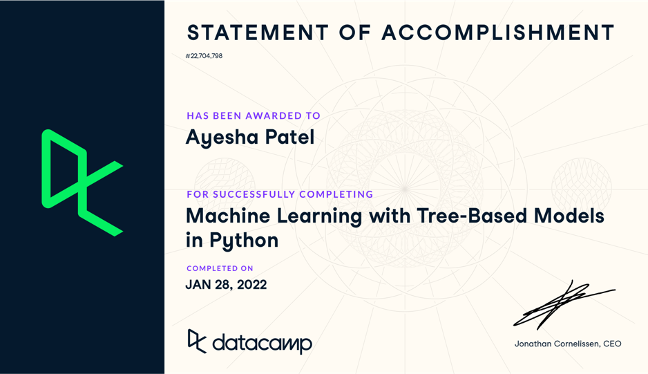